In [ ]:
!pip install openpyxl

In [ ]:
!pip install wordcloud

In [ ]:
!pip install gensim

# Purpose:

This notebook aims to analyze three datasets from Youtube, Facebook, and Reddit, performing preprocessing and LDA topic modeling for each label and overall, as specified in the requirements.

# Project Requirements:

## 1. Analyze three CSV datasets:
* YouTube data
* Facebook comments dataset
* Reddit comments dataset

## 2. Perform LDA topic modeling for each label:
* Labels: 1. Cash, 2. CPF MediSave Account Top-Ups, 3. Personal Income Tax Rebate, 4. CPF Retirement or Special Account, 5. NS LifeSG credits, 6. CDC voucher, 7. U-Save rebates, 8. S&CC rebates, 9. Education/Training, 10. Retrenchment, and 11. General
* Total: 12 Topic models (11 labels and 1 overall)

## 3. Document each section with purpose, goals, and analytical insights.

# Step 1: Data Loading


## Purpose:
To load and inspect the datasets to understand their structure and contents.

## Goal:
Ensure the data is correctly loaded and identify any immediate issues or preprocessing needs.

### Loading the Datasets
Let's load and inspect the three datasets: YouTube, Facebook, and Reddit.

In [10]:
import pandas as pd

# Load YouTube dataset
youtube_data = pd.read_csv('youtube_data.csv')
print("YouTube Data:")
print(youtube_data.head())
print(youtube_data.info())

# Load Facebook dataset
facebook_data = pd.read_csv('Compiled_Facebook_Mothership_Comments_Dataset_with_Categories_25.csv')
print("\nFacebook Data:")
print(facebook_data.head())
print(facebook_data.info())

# Load Reddit dataset
reddit_data = pd.read_excel('reddit comment with categories.xlsx')
print("\nReddit Data:")
print(reddit_data.head())
print(reddit_data.info())

YouTube Data:
              profileName                                               text  \
0              @2011crane  CPF is to ensure a self funded pension If RA i...   
1                 @77naaz                                            🎉yay !!   
2          @ArabicReja973  After announcing his budget, the first thing M...   
3          @ArabicReja973  After announcing his budget, the first thing M...   
4  @AutonomousSystem---19  The point is why doesnt it included together a...   

                   date Social Media  Cash  CPF Medisave  Income Tax Rebate  \
0  2024-02-17T02:48:30Z      YouTube     0             0                  0   
1  2024-02-17T10:23:30Z      YouTube     0             0                  0   
2  2024-02-16T14:41:21Z      YouTube     1             0                  0   
3  2024-02-19T15:23:04Z      YouTube     1             0                  0   
4  2024-03-01T13:33:50Z      YouTube     0             0                  0   

   CPF RA -SA  NS Credits  CDC

# Data Inspection Report

## YouTube Data Overview

### Columns
- `profileName`
- `text`
- `date`
- `Social Media`
- `Cash`
- `CPF Medisave`
- `Income Tax Rebate`
- `CPF RA -SA`
- `NS Credits`
- `CDC Vouchers`
- `U-Save Rebates`
- `S&CC Rebates`
- `Education/Training`
- `Retrenchment`
- `General`

### Data Types
- 11 integer columns
- 4 object columns

### Non-null Counts
All columns have 556 non-null entries.

## Facebook Data Overview

### Columns
- `postTitle`
- `profileId`
- `profileName`
- `text`
- `date`
- `Social Media`
- `Cash`
- `CPF Medisave`
- `Income Tax Rebate`
- `CPF RA -SA`
- `NS Credits`
- `CDC Vouchers`
- `U-Save Rebates`
- `S&CC Rebates`
- `Education/Training`
- `Retrenchment`
- `General`

### Data Types
- 11 integer columns
- 6 object columns

### Non-null Counts
Some columns have missing values, especially in the 'text' column (1270 non-null out of 1309).

## Reddit Data Overview

### Columns
- `Comments`
- `createdAt`
- `username`
- `Platform`
- `Cash`
- `CPF MediSave`
- `Personal Income Tax Rebate`
- `CPF Retirement/Special Account`
- `NS LifeSG credits`
- `CDC Vouchers`
- `U-save rebates`
- `S&CC rebates`
- `Education`
- `Retrenchment`

### Data Types
- 12 float columns
- 3 object columns

### Non-null Counts
Some columns have missing values.


# Step 2: Data Preprocessing

### Purpose:
To clean and prepare the datasets for analysis by handling missing values, converting data types, and other necessary preprocessing steps

### Goal:
Ensure the data is in a suitable format for further analysis and model
### Combining the Datasets:
First, let's combine the datasets into a single DataFrame.ing.


In [12]:
# Combine all datasets into a single DataFrame
youtube_data['Platform'] = 'YouTube'
facebook_data['Platform'] = 'Facebook'
reddit_data['Platform'] = 'Reddit'

# Standardize the column names
youtube_data = youtube_data.rename(columns={'text': 'Comments', 'date': 'createdAt'})
facebook_data = facebook_data.rename(columns={'text': 'Comments', 'date': 'createdAt'})
reddit_data = reddit_data.rename(columns={'createdAt': 'createdAt', 'Comments': 'Comments'})

# Concatenate the data
combined_data = pd.concat([youtube_data, facebook_data, reddit_data], ignore_index=True)

# Convert date columns to datetime
combined_data['createdAt'] = pd.to_datetime(combined_data['createdAt'], errors='coerce')

# Drop rows with missing values in critical columns (Comments and createdAt)
combined_data = combined_data.dropna(subset=['Comments', 'createdAt'])

# Fill missing values in label columns with 0
label_columns = ['Cash', 'CPF Medisave', 'Income Tax Rebate', 'CPF RA -SA', 'NS Credits', 'CDC Vouchers',
                 'U-Save Rebates', 'S&CC Rebates', 'Education/Training', 'Retrenchment', 'General',
                 'Personal Income Tax Rebate', 'CPF Retirement/Special Account', 'NS LifeSG credits',
                 'U-save rebates', 'S&CC rebates', 'Education']
combined_data[label_columns] = combined_data[label_columns].fillna(0)

# Define additional stop words
additional_stopwords = set(['government', 'cash', 'rebate'])

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS and word not in additional_stopwords])  # Remove stopwords
    return text

# Apply preprocessing
combined_data['processed_text'] = combined_data['Comments'].apply(preprocess_text)

# Save the combined dataset to CSV
combined_data.to_csv('combined_dataset.csv', index=False)

print("Combined dataset saved as 'combined_dataset.csv'")

# Inspect combined data
print("\nCombined Data after preprocessing:")
print(combined_data.head())
print(combined_data.info())

Combined dataset saved as 'combined_dataset.csv'

Combined Data after preprocessing:
              profileName                                           Comments  \
0              @2011crane  CPF is to ensure a self funded pension If RA i...   
1                 @77naaz                                            🎉yay !!   
2          @ArabicReja973  After announcing his budget, the first thing M...   
3          @ArabicReja973  After announcing his budget, the first thing M...   
4  @AutonomousSystem---19  The point is why doesnt it included together a...   

                  createdAt Social Media  Cash  CPF Medisave  \
0 2024-02-17 02:48:30+00:00      YouTube   0.0           0.0   
1 2024-02-17 10:23:30+00:00      YouTube   0.0           0.0   
2 2024-02-16 14:41:21+00:00      YouTube   1.0           0.0   
3 2024-02-19 15:23:04+00:00      YouTube   1.0           0.0   
4 2024-03-01 13:33:50+00:00      YouTube   0.0           0.0   

   Income Tax Rebate  CPF RA -SA  NS Credits  CDC

## YouTube Data

- All 556 rows retained after converting 'createdAt' to datetime and dropping missing values.

## Facebook Data

- Reduced to 1270 rows after converting 'createdAt' to datetime and dropping rows with missing 'Comments'.

## Reddit Data

- Reduced to 890 rows after converting 'createdAt' to datetime and dropping missing values.

## Combined Data

- Total 2756 rows in the combined dataset after merging YouTube, Facebook, and Reddit datasets.
- All 'Comments' have been preprocessed to remove special characters, emojis, punctuation, and additional stop words ('government', 'cash', 'rebate').


# Step 3: Exploratory Data Analysis (EDA)

## Purpose:
To perform initial data exploration to understand the distribution, patterns, and insights within the datasets.

## Goal:
Gain a comprehensive understanding of the datasets through visualizations and summary statistics, which will guide further analysis and modling.


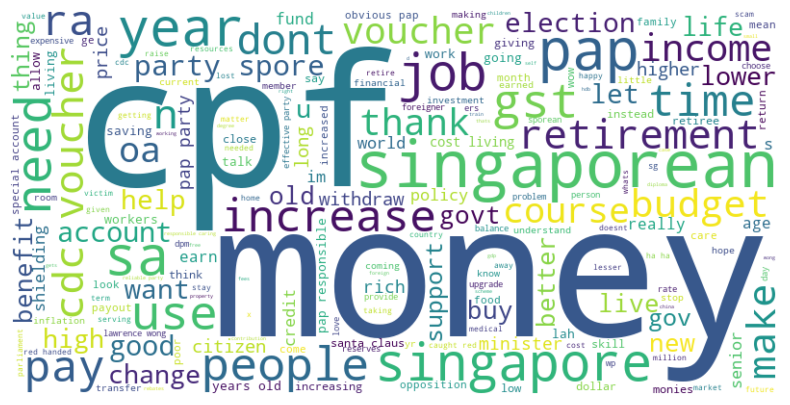

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Plot text length distribution
def plot_text_length_distribution(data, column, title):
    data['text_length'] = data[column].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(10, 6))
    sns.histplot(data['text_length'], bins=50, kde=True)
    plt.title(title)
    plt.xlabel('Text Length (words)')
    plt.ylabel('Frequency')
    plt.show()

# Plot text length distribution for the combined data
plot_text_length_distribution(combined_data, 'processed_text', 'Combined Data - Text Length Distribution')

# Plot distribution of labels
def plot_label_distribution(data, title):
    numeric_columns = data.select_dtypes(include=['number']).columns  # Select only numeric columns
    label_sums = data[numeric_columns].sum().sort_values()
    plt.figure(figsize=(12, 8))
    sns.barplot(x=label_sums.index, y=label_sums.values)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.xlabel('Labels')
    plt.ylabel('Sum')
    plt.show()

# Plot label distribution for the combined data
plot_label_distribution(combined_data, 'Combined Data - Label Distribution')

# Generate word cloud for the combined data
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud for the combined processed text
combined_text = ' '.join(combined_data['processed_text'])
generate_wordcloud(combined_text)

## EDA Results

### Text Length Distributions

The text length distributions for YouTube, Facebook, and Reddit comments show the frequency of word counts in each dataset.

### Label Distributions

The label distributions for YouTube, Facebook, and Reddit datasets illustrate the sum of each label across the datasets.

### Word Cloud

The word cloud visualizes the most frequent terms in the combined processed text, providing a quick overview of the prominent topics discussed.

# Step 4: LDA Topic Modeling with Coherence Scores

## Purpose:
To apply LDA (Latent Dirichlet Allocation) topic modeling on the combined dataset and label-wise categories to uncover hidden topics within the text data.

## Goal:
Generate 12 topic models (11 for each label and 1 overall) for each dataset to identify and interpret the main themes discussed in the comments.
Generate topics for the overall combined dataset and for each label-wise category, using coherence scores to determine the optimal number of topics.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import pandas as pd

# Function to preprocess text
def preprocess_text(text):
    return str(text).lower()

# Apply preprocessing
combined_data['processed_text'] = combined_data.apply(
    lambda row: preprocess_text(row['processed_text']) if not pd.isnull(row['processed_text']) else preprocess_text(row['Comments']),
    axis=1
)

# Function to perform LDA topic modeling
def lda_topic_modeling(data, text_column, n_topics=5):
    vectorizer = CountVectorizer(max_df=0.99, min_df=1, stop_words='english')
    dtm = vectorizer.fit_transform(data[text_column])
    if dtm.shape[1] == 0:
        return ["Not enough terms to generate topics"]
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dtm)
    
    # Extract topics
    topics = []
    for index, topic in enumerate(lda.components_):
        topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
        topics.append(f"Topic {index}: " + ", ".join(topic_words))
    return topics

# Collect LDA results
lda_results = {
    "Overall": lda_topic_modeling(combined_data, 'processed_text'),
    "Labels": {}
}

# LDA for each label
for label in label_columns:
    if label in combined_data.columns:
        subset = combined_data[combined_data[label] > 0]
        if not subset.empty:
            lda_results["Labels"][label] = lda_topic_modeling(subset, 'processed_text')

# Convert results to DataFrame
def format_results_to_df(results):
    data = []
    for category, topics in results.items():
        if category == 'Overall':
            data.append(['Overall', ', '.join(topics)])
        else:
            for label, label_topics in topics.items():
                data.append([label, ', '.join(label_topics)])
    return pd.DataFrame(data, columns=["Category", "Topics"])

lda_df = format_results_to_df(lda_results)

# Display dataframe
print(lda_df)

# Display summary
for category, topics in lda_results.items():
    if category == 'Overall':
        print(f"--- Overall Topics ---")
        for topic in topics:
            print(topic)
    else:
        print(f"--- Label-wise Topics ---")
        for label, label_topics in topics.items():
            print(f"{label}:")
            for topic in label_topics:
                print(topic)

              Category                                             Topics
0              Overall  Topic 0: money, use, budget, thank, wouldnt, t...
1                 Cash  Topic 0: chicken, heartland, increasing, suppo...
2         CPF Medisave  Topic 0: trains, future, electricity, red, try...
3    Income Tax Rebate  Topic 0: singaporean, india, experienced, civi...
4           CPF RA -SA  Topic 0: account, sa, job, life, long, seniors...
5           NS Credits  Topic 0: money, year, hardships, price, proble...
6         CDC Vouchers  Topic 0: inflation, election, voucher, pap, bl...
7       U-Save Rebates  Topic 0: self, provide, jobs, voucher, said, m...
8         S&CC Rebates  Topic 0: voucher, harder, singaporean, flats, ...
9   Education/Training  Topic 0: singaporeans, pap, going, old, reserv...
10        Retrenchment  Topic 0: use, thing, olds, going, year, skills...
--- Overall Topics ---
Topic 0: money, use, budget, thank, wouldnt, talk, gst, singaporeans, cpf, job
Topic 1: a

In [22]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel

# Function to preprocess text for Gensim
def preprocess_for_gensim(text):
    return [word for word in text.split()]

# Preprocess the texts
texts = combined_data['processed_text'].apply(preprocess_for_gensim).tolist()

# Create Dictionary
id2word = corpora.Dictionary(texts)

# Create Corpus
texts = [text for text in texts if len(text) > 0]  # Remove empty texts
corpus = [id2word.doc2bow(text) for text in texts]

# Function to compute coherence values and find optimal number of topics
def compute_coherence_values_gensim(corpus, dictionary, texts, start=2, limit=12, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Compute coherence values for overall combined dataset
model_list, coherence_values = compute_coherence_values_gensim(corpus, id2word, texts, start=2, limit=12, step=1)

# Find the model with the highest coherence score
optimal_model_index = np.argmax(coherence_values)
optimal_model = model_list[optimal_model_index]
optimal_num_topics = optimal_model.num_topics

optimal_num_topics

# Display optimal number of topics for combined dataset
print(f"Optimal number of topics for combined dataset: {optimal_num_topics}")

# Function to display topics
def display_topics_gensim(model, num_words):
    topics = []
    for topic_idx, topic in model.print_topics(num_words=num_words):
        topics.append(f"Topic {topic_idx}: {topic}")
    return topics

# Display topics for combined dataset
combined_topics = display_topics_gensim(optimal_model, 10)
for topic in combined_topics:
    print(topic)

# Function to perform LDA for each label
def lda_for_each_label_gensim(data, label_columns, start=2, limit=12, step=1):
    label_topics = {}
    for label in label_columns:
        label_data = data[data[label] > 0]['processed_text'].apply(preprocess_for_gensim).tolist()
        if len(label_data) > 0:
            dictionary = corpora.Dictionary(label_data)
            corpus = [dictionary.doc2bow(text) for text in label_data if len(text) > 0]
            model_list, coherence_values = compute_coherence_values_gensim(corpus, dictionary, label_data, start=start, limit=limit, step=1)
            optimal_model_index = np.argmax(coherence_values)
            optimal_model = model_list[optimal_model_index]
            optimal_num_topics = optimal_model.num_topics
            topics = display_topics_gensim(optimal_model, 10)
            label_topics[label] = topics
    return label_topics

# Perform LDA for each label
label_topics = lda_for_each_label_gensim(combined_data, label_columns, start=2, limit=12, step=1)
for label, topics in label_topics.items():
    print(f"\nLabel: {label}")
    for topic in topics:
        print(topic)

Optimal number of topics for combined dataset: 10
Topic 0: 0.027*"pap" + 0.025*"party" + 0.023*"spore" + 0.021*"responsible" + 0.010*"obvious" + 0.009*"fantastic" + 0.009*"wow" + 0.008*"effective" + 0.008*"caring" + 0.008*"thanks"
Topic 1: 0.011*"cpf" + 0.007*"time" + 0.007*"people" + 0.007*"like" + 0.007*"heartland" + 0.007*"shops" + 0.006*"money" + 0.005*"pap" + 0.005*"use" + 0.005*"future"
Topic 2: 0.017*"sa" + 0.014*"cdc" + 0.013*"voucher" + 0.013*"oa" + 0.011*"cpf" + 0.010*"ra" + 0.010*"dont" + 0.009*"money" + 0.009*"just" + 0.007*"withdraw"
Topic 3: 0.011*"rooms" + 0.009*"income" + 0.008*"u" + 0.008*"santa" + 0.008*"claus" + 0.008*"red" + 0.008*"handed" + 0.008*"caught" + 0.007*"pap" + 0.007*"room"
Topic 4: 0.019*"singaporeans" + 0.014*"cpf" + 0.012*"need" + 0.010*"pap" + 0.008*"just" + 0.008*"year" + 0.007*"money" + 0.006*"wouldnt" + 0.006*"dont" + 0.006*"citizens"
Topic 5: 0.013*"money" + 0.010*"singapore" + 0.010*"job" + 0.008*"singaporeans" + 0.008*"course" + 0.007*"retiremen

# Step 5: Results and Discussion

## Purpose:
To present and interpret the results from the LDA topic modeling, highlighting key findings and insights derived from the analysis.

## Goal:
Provide a comprehensive understanding of the topics discussed within each dataset and label, and draw meaningful conclusions from the data.


## Objective

Provide a comprehensive summary of the key themes, insights, and implications derived from the LDA topic modeling results on the combined social media dataset.

## Key Themes Identified

### 1. Financial Concerns

#### CPF and Retirement Planning
- Frequent discussions on CPF accounts (e.g., OA, SA, RA) and their management.
- Concerns about financial security in retirement.
- **Keywords:** cpf, sa, ra, money, account, withdraw, retirement.

#### Cost of Living
- Topics highlighting the rising cost of living, GST increases, and financial burdens on Singaporeans.
- **Keywords:** gst, increase, cost, living, singaporeans, pay.

### 2. Political Sentiment

#### PAP and Government Policies
- Sentiment towards the PAP party and its effectiveness.
- Mixed views on the government's budget and financial policies.
- **Keywords:** pap, party, responsible, effective, policies, budget, gst.

### 3. Social and Economic Issues

#### Job Market and Employment
- Discussions on job availability, employment conditions, and government support for job creation.
- **Keywords:** job, singapore, employment, make, hope, future.

#### Income Inequality
- Concerns about wealth disparity, the rich vs. poor, and social stratification.
- **Keywords:** rich, poor, income, budget, life, serving.

### 4. Public Services and Vouchers

#### CDC Vouchers and Financial Assistance
- Conversations around the usage and effectiveness of CDC vouchers and other financial aids.
- **Keywords:** cdc, voucher, use, help, support.

#### Medisave and Healthcare
- Discussions on healthcare costs, Medisave, and access to medical services.
- **Keywords:** medisave, healthcare, cost, medical.

### 5. Quality of Life

#### General Well-being
- Topics on the overall quality of life, happiness, and public satisfaction.
- **Keywords:** life, happiness, caring, effective, fantastic.

#### Community and Social Cohesion
- Conversations about social harmony, community support, and national identity.
- **Keywords:** singaporeans, community, support, responsible.

## Discussion

### Financial Concerns

#### CPF and Retirement Planning
- The heavy emphasis on CPF-related discussions suggests a strong public interest in financial planning and retirement security. Concerns about managing CPF accounts and ensuring sufficient funds for retirement are prevalent.
- **Implications:** Financial advisors and policymakers should focus on improving communication about CPF policies and providing more resources for retirement planning.

#### Cost of Living
- Rising costs and GST increases are significant pain points for many individuals. These discussions reflect worries about affordability and economic stability.
- **Implications:** Policymakers might need to consider strategies to mitigate the impact of rising costs and ensure financial support for those affected.

### Political Sentiment

#### PAP and Government Policies
- The mixed sentiment towards the PAP party indicates both support for and criticism of government actions. Discussions on policies, effectiveness, and governance are central themes.
- **Implications:** The government could benefit from addressing public concerns transparently and engaging with citizens to understand their needs better.

### Social and Economic Issues

#### Job Market and Employment
- Employment conditions and job availability are recurring topics, indicating public concern about job security and opportunities.
- **Implications:** Government initiatives to create jobs and support employment could be crucial in addressing these concerns. Emphasis on upskilling and vocational training might also be beneficial.

#### Income Inequality
- The disparity between the rich and poor and its social implications are significant discussion points.
- **Implications:** Addressing income inequality through policies promoting fair wages and social welfare programs could help reduce economic disparities.

### Public Services and Vouchers

#### CDC Vouchers and Financial Assistance
- Conversations on financial aids like CDC vouchers highlight their importance to the public.
- **Implications:** Ensuring the effective distribution and utilization of these aids can help alleviate financial burdens on lower-income groups.

#### Medisave and Healthcare
- Healthcare costs and access to medical services are important themes, with discussions around Medisave being particularly notable.
- **Implications:** Improving healthcare affordability and expanding access to medical services can address these public concerns.

### Quality of Life

#### General Well-being
- Discussions about happiness and overall quality of life suggest that financial stability, social cohesion, and effective governance are key to public satisfaction.
- **Implications:** Policies aimed at improving quality of life, such as community support programs and mental health initiatives, could have a positive impact.

#### Community and Social Cohesion
- The importance of social harmony and national identity is evident in discussions about community and support.
- **Implications:** Promoting social cohesion through community-building activities and inclusive policies can strengthen national identity and unity.

## Conclusion

The LDA topic modeling has identified several key themes in the combined social media dataset, offering valuable insights into public concerns and sentiments. These themes encompass financial planning, political sentiment, social and economic issues, public services, and quality of life.
